In [7]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from random import randrange
from scipy.optimize import fmin_bfgs

In [8]:
mat = scipy.io.loadmat('machine-learning-ex3\ex3\ex3data1.mat')
X = mat['X']
y = mat['y'].flatten()
y[y==10] = 0
m = y.size
def pixelToImage(pixelArr):
    img = []
    for i in range(0,19):
        img.append(pixelArr[i*20:i*20+20])
    return img

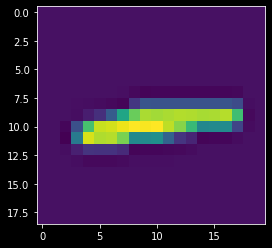

In [9]:
randomimg = pixelToImage(X[randrange(5000)])

plt.imshow(randomimg,interpolation='none')

In [10]:
def costFunction(theta, X, y, lamb=0):
    hx = sigmoid(X.dot(theta))

    J = -1/m*(np.log(hx).T.dot(y)+np.log(1-hx).T.dot(1-y))
    J += lamb/(2*m)*(sum(np.power(theta[1:],2)))
    return J

def sigmoid(x):
    return(1 / (1 + np.exp(-x)))

def gradient(theta,X, y, lamb=0):

    # fmin_bfgs gives one dim theta so need to add one more dim
    temp = sigmoid(np.dot(X, theta[...,np.newaxis]))
    temp = temp-y
    temp = np.dot(X.T, temp)
    temptheta = np.copy(theta)
    temptheta[0] = 0
    temptheta = temptheta[:,np.newaxis]
    theta = (1/m) * temp + (lamb/m) * temptheta
    return theta.flatten()

In [11]:
def oneVsAllClass(theta,X,y,lamb=0):
    res = fmin_bfgs(costFunction,theta, args=(X,y,lamb),fprime=gradient)
    return res

def setYfornumber(yInput,i):
    y = np.copy(yInput)
    y[y!=i] = -1
    y[y==i] = 1
    y[y!=1] = 0
    return y[:,np.newaxis]

theta = np.zeros((X.shape[1],10))
for i in range(0,10):
    theta[:,i] = oneVsAllClass(theta[:,i],X,setYfornumber(y,i),0)
    


C:\Users\Gurpreet Heir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Gurpreet Heir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Gurpreet Heir\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1 * alpha1 * derphi0) or \
C:\Users\Gurpreet Heir\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: RuntimeWarning: invalid value encountered in greater_equal
  ((phi_a1 >= phi_a0) and (i > 1)):
         Current function value: nan
         Iterations: 134
         Function evaluations: 148
         Gradient evaluations: 148
C:\Users\Gurpreet Heir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:

93.66
9
9


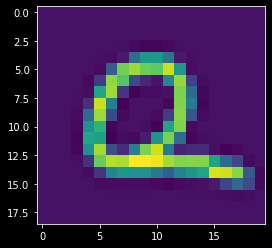

In [15]:
def predict(input):
    pred = 0
    chance = 0
    for i in range(0,10):
        prob = input.dot(theta[:,i])
        if(prob>chance):
            pred = i
            chance = prob
    return pred
num = randrange(5000)
randomimg = pixelToImage(X[num])
def predictAll():
    wrong = 0
    for i in range(0,5000):
        if(predict(X[i])!=y[i]):
            wrong+=1
    return 100-wrong/5000*100

print(predictAll())

plt.imshow(randomimg,interpolation='none')
print(predict(X[num]))
print(y[num])

